In [22]:
import numpy as np
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
from util import *
from Functions import *
%matplotlib inline

In [ ]:
withllrs_modification=False

1. Define the Standard Signals

In [23]:
ch, inv_ch, known_frames, carrier_indices = create_standard()

Creating known ofdm frame


2. Read the recorded sound file

In [11]:
rx_signal = sf.read("sound_files/standard_v1.2_10.8s.wav")[0]
'''
channel = np.load('channel_imp.npy')
channel -= np.average(channel)
rx_signal = np.convolve(tx_signal, channel)
'''

"\nchannel = np.load('channel_imp.npy')\nchannel -= np.average(channel)\nrx_signal = np.convolve(tx_signal, channel)\n"

3. Some useful plots

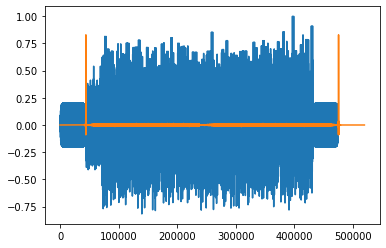

In [29]:
plt.plot(rx_signal)
plt.plot(np.concatenate()

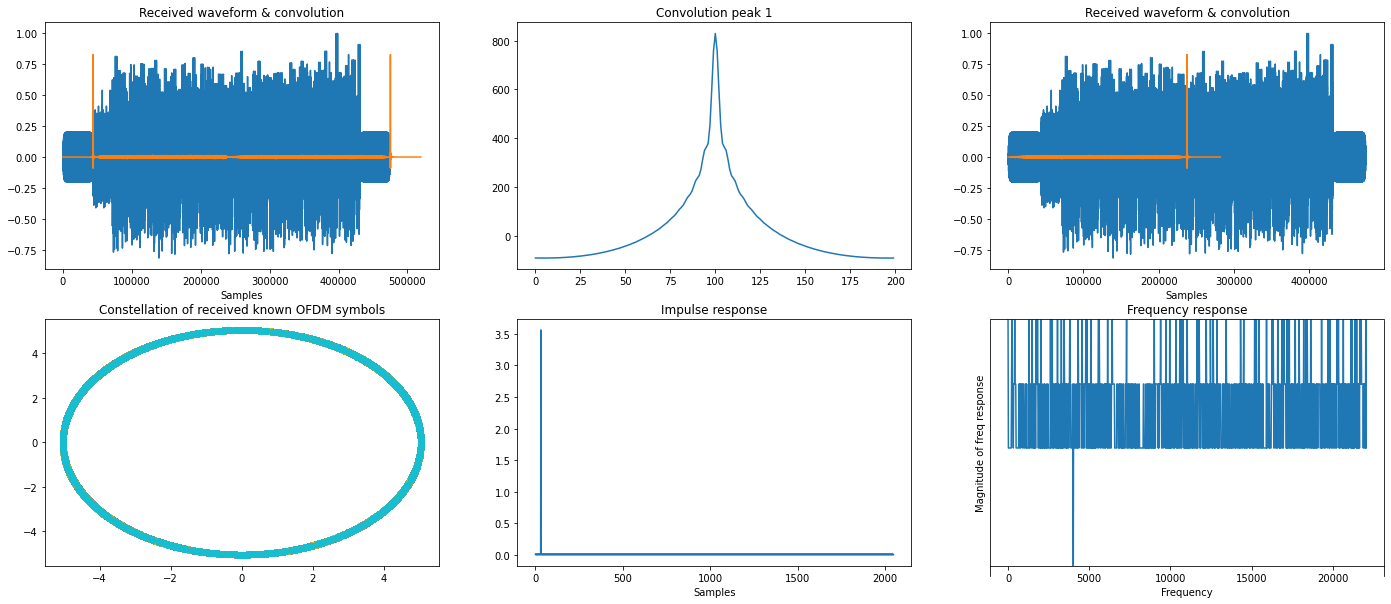

In [31]:
rx_convolution_1, rx_convolution_2, peak_start, peak_end = matched_filter(rx_signal, inv_ch, ch)
offset = 30
freq_response, imp_response, rx_known_frames = channel_estimate(rx_signal, peak_start, known_frames, offset)
figs, axs = plt.subplots(2, 3, figsize=(24,10))
axs[0][0].plot(rx_signal)
axs[0][0].set_title('Received waveform & convolution')
axs[0][0].plot(np.concatenate((rx_convolution_1[:-44100]/1000, rx_convolution_2/1000), axis=None))
axs[0][0].set_xlabel('Samples')
axs[0][1].set_title('Convolution peak 1')
axs[0][1].plot(rx_convolution_1[peak_start-100:peak_start+100])

axs[0][2].plot(rx_signal)
axs[0][2].set_title('Received waveform & convolution')
axs[0][2].plot(rx_convolution_2/1000)
axs[0][2].set_xlabel('Samples')

for i in range(len(rx_known_frames)):
    tst_symbols = np.fft.fft(rx_known_frames[i][prefix_no:], N)[1:N//2]
    axs[1][0].scatter(np.real(tst_symbols), np.imag(tst_symbols), label=i)
axs[1][0].set_title('Constellation of received known OFDM symbols')

axs[1][1].set_title('Impulse response')
axs[1][1].set_xlabel('Samples')
axs[1][1].plot(imp_response)
axs[1][2].set_title('Frequency response')
axs[1][2].set_ylabel('Magnitude of freq response')
axs[1][2].set_xlabel('Frequency')
axs[1][2].semilogy(np.linspace(1, fs//2 -1, N//2-2), np.abs(freq_response[1:N//2-1]))

4. File decoding

Manual Block

In [21]:
bits_rec, imp_response = test(rx_signal, peak_start, peak_end, known_frames, inv_ch, carrier_indices, 0)

inside LDPC_decode_with_niceCKs
type(ys_)= <class 'numpy.ndarray'>
type(cks)= <class 'numpy.ndarray'>
about to ys_=ys_/ cks
ys_=ys_/ cks finished
about to do ys=separate_real_img(ys_)
about to do divide_codebits
about to loop
decoding 0th LDPC block, 84 in total tif= 0  txt= 3  wav= 0
file_type:  .txt

total_length:  159648  bits to decode.
file_length: 79824
decoding 82th LDPC block, 84 in total
padding_bits_len:  652
llrs_index_start:  320
violating llr at llrs_index_start+i= 321
violating llr at llrs_index_start+i= 324
violating llr at llrs_index_start+i= 326
violating llr at llrs_index_start+i= 327
violating llr at llrs_index_start+i= 328
violating llr at llrs_index_start+i= 330
violating llr at llrs_index_start+i= 331
violating llr at llrs_index_start+i= 339
violating llr at llrs_index_start+i= 341
violating llr at llrs_index_start+i= 342
violating llr at llrs_index_start+i= 343
violating llr at llrs_index_start+i= 344
violating llr at llrs_index_start+i= 345
violating llr at llrs

Auto Block

In [20]:
bits_rec, best_imp_response = fine_tuning(rx_signal, peak_start, peak_end, known_frames, inv_ch, carrier_indices, withllrs_modification=withllrs_modification, find_range=30, offset=20)

index and score are: -15 17.28981481481479
index and score are: -14 17.28981481481479
index and score are: -13 17.28981481481479
index and score are: -12 17.28981481481479
index and score are: -11 17.28981481481479
index and score are: -10 17.289814814814786
index and score are: -9 17.28981481481479
index and score are: -8 17.28981481481479
index and score are: -7 17.28981481481479
index and score are: -6 17.28981481481479
index and score are: -5 17.28981481481479
index and score are: -4 17.28981481481479
index and score are: -3 17.28981481481479
index and score are: -2 17.28981481481479
index and score are: -1 17.28981481481479
index and score are: 0 17.28981481481479
index and score are: 1 17.28981481481479
index and score are: 2 17.289814814814793
index and score are: 3 17.28981481481479
index and score are: 4 17.28981481481479
index and score are: 5 17.28981481481479
index and score are: 6 17.28981481481479
index and score are: 7 17.28981481481479
index and score are: 8 17.28981481